In [1]:
import numpy as np
import pandas as pd
import sys, os, glob, corner
import matplotlib.pyplot as plt
from jaxstar.utils import *

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='sans-serif')
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [4]:
dinput = pd.read_csv("input/simulated-cks.csv")

In [5]:
dinput["kepid"] = ["%05d"%k for k in dinput.kepid]

In [6]:
postdir = "posteriors_simulated_cks/"

In [7]:
obskeys = ['teff', 'feh', 'kmag', 'parallax']
keys = ['age', 'mass', 'radius'] + obskeys

In [8]:
dinput

,teff_true,kmag_true,eep_true,radius_true,mass_true,age_true,feh_true,parallax_true,teff_error,feh_error,kmag_error,parallax_error,teff_obs,feh_obs,kmag_obs,parallax_obs,kepid
0,6080.3257,11.807929,324.19385,1.075773,1.117882,1.284742,0.042495,1.783932,110,0.1,0.023,0.017839,5960.906317,-0.007953,11.827446,1.808729,00000
1,5424.2810,8.174685,361.79460,0.887108,0.871684,8.103053,-0.008863,12.329660,110,0.1,0.023,0.123297,5533.988761,-0.109939,8.178037,12.217971,00001
2,5096.9316,11.723109,343.40260,0.807313,0.836111,6.576701,0.063673,2.741761,110,0.1,0.023,0.027418,5128.059275,0.042497,11.739475,2.691762,00002
3,5596.0370,13.109622,455.46870,1.625983,1.030789,9.725930,0.094457,0.679445,110,0.1,0.023,0.006794,5430.344691,0.290667,13.070660,0.673113,00003
4,5887.0820,9.844641,451.52230,1.749850,1.131681,6.424003,0.052259,2.762673,110,0.1,0.023,0.027627,5823.436004,0.039820,9.822724,2.778121,00004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,6573.7637,12.822071,348.10324,1.206736,1.134840,2.208466,-0.256062,0.963526,110,0.1,0.023,0.009635,6565.908178,-0.322389,12.776534,0.971740,15067
15068,5075.4350,12.423982,369.37918,0.806572,0.776269,13.060516,-0.037087,1.998053,110,0.1,0.023,0.019981,5107.172125,-0.006325,12.433075,1.988845,15068
15069,5782.2617,12.139119,377.80658,1.032693,0.967044,6.462225,-0.006477,1.643043,110,0.1,0.023,0.016430,5658.184073,-0.039812,12.113250,1.637834,15069
15070,4740.5664,11.903067,300.73666,0.779768,0.866244,1.745550,0.458517,2.709034,110,0.1,0.023,0.027090,4686.140335,0.462035,11.882585,2.680929,15070


In [ ]:
dpct = summary_stats(postdir, dinput.kepid, keys, obskeys).rename({"name": "kepid"}, axis='columns')

In [ ]:
d = pd.merge(dpct, dinput[["kepid"]+[_k+"_obs" for _k in obskeys]+[_k+"_error" for _k in obskeys]+[_k+"_true" for _k in keys]], on='kepid')

In [ ]:
for key in obskeys:
    d["d"+key] = d["iso_"+key] - d[key+"_obs"]
    d["dsigma"+key] = d["d"+key] / d[key+"_error"]
d["dsigmaobs"] = np.sqrt(np.sum(np.array(d[["dsigma"+k for k in obskeys]])**2, axis=1))

In [ ]:
fig = corner.corner(d[["dsigmateff", "dsigmafeh", "dsigmakmag", "dsigmaparallax"]], plot_contours=False)
fig = corner.overplot_points(fig, d[["dsigmateff", "dsigmafeh", "dsigmakmag", "dsigmaparallax"]])

In [ ]:
idxgood = (d.dsigmaobs < 2)
d["idx"] = idxgood

In [99]:
d.to_csv("simulated-cks_results.csv", index=False)

### check stars with large dsigmaobs

In [91]:
d[~d.idx]

,kepid,iso_age,iso_age_upp,iso_age_low,iso_mass,iso_mass_upp,iso_mass_low,iso_radius,iso_radius_upp,iso_radius_low,...,dteff,dsigmateff,dfeh,dsigmafeh,dkmag,dsigmakmag,dparallax,dsigmaparallax,dsigmaobs,idx
17,00017,0.355704,2.278171,0.255267,1.000077,0.023766,0.034090,0.908426,0.013687,0.011366,...,-190.002488,-1.727295,-0.123555,-1.235551,-0.005800,-0.252184,-0.003314,-0.300289,2.159608,False
26,00026,2.296810,0.086685,0.072582,1.648100,0.016170,0.015523,2.603592,0.039022,0.033881,...,859.419322,7.812903,0.581196,5.811958,0.006645,0.288919,0.002569,0.338104,9.747723,False
70,00070,2.247046,1.217782,0.119092,1.565185,0.021481,0.254141,2.472988,0.065459,0.040467,...,199.241685,1.811288,0.240337,2.403369,0.001243,0.054063,0.001065,0.151937,3.013794,False


In [96]:
sidx = 26#17

In [97]:
filename = postdir + "%s_samples.csv"%d.kepid[sidx]
smp = pd.read_csv(filename)

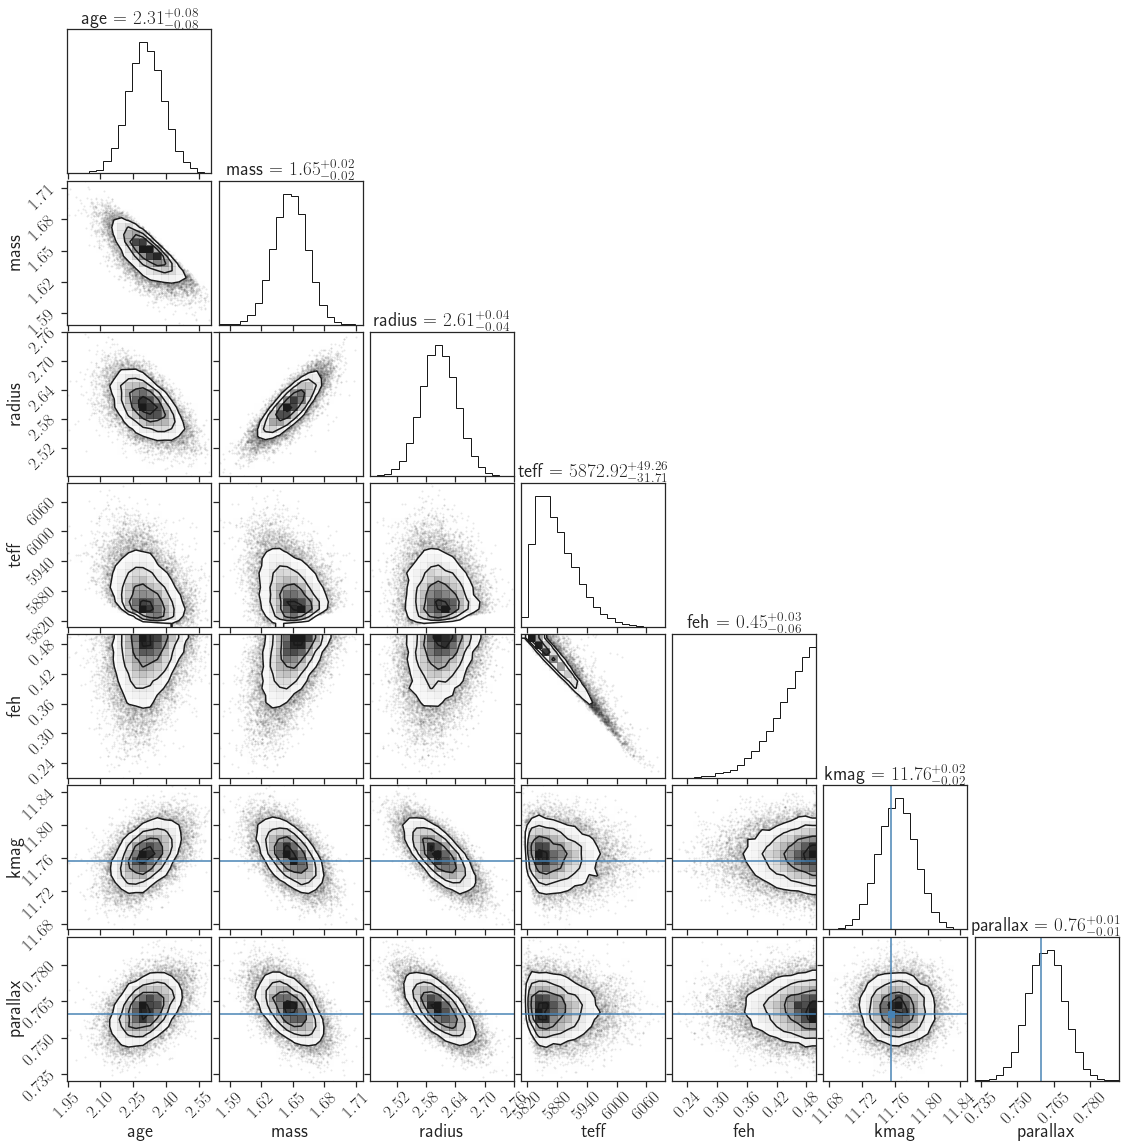

In [98]:
fig = corner.corner(smp[keys], truths=[None]*3+list(d.iloc[sidx][[_k+"_obs" for _k in obskeys]]), 
                    show_titles=True, title_fmt='.2f')